# Linear regression

Download data from files and combine them into one dataframe.

In [1]:
setwd("D:\\myFiles\\lab1\\data")

filenames=list.files()

datalist = lapply(filenames,
                  function(x) {
                    x0 <- read.csv(file=x, header=F)[,c(1,6)];
                    colnames(x0) <- c("data", unlist(strsplit(x,"[_.]"))[2]);
                    x0
                  })

y <- Reduce(function(x,y) {merge(x, y, by="data")}, datalist)

Let's look at the first lines of the dataframe.

In [2]:
head(y)

,data,bhi,biib,bk,blk,bll,bmc,bms,bmy,brcm,brkb
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19991001,24.5368,15.7184,23.8737,11.4692,4.72189,69.00,11.2069,37.8535,35.8489,36.74
2,19991004,23.3775,15.7600,24.4687,11.5263,4.68053,69.94,11.4416,38.5965,37.4293,37.80
3,19991005,22.3707,16.1050,24.7479,11.5263,4.56515,71.31,11.3566,38.0904,38.3890,38.28
4,19991006,23.2676,17.7917,26.2170,12.0321,4.54447,70.00,11.3770,39.8079,39.6079,38.72
5,19991007,22.8445,17.5834,25.8057,11.5263,4.56515,63.75,11.7376,39.3341,39.6687,38.20
6,19991008,22.9546,17.3750,26.8561,11.4692,4.71427,59.94,11.8227,40.9169,38.1683,38.28


Let's look at the matrix scatter diagram.

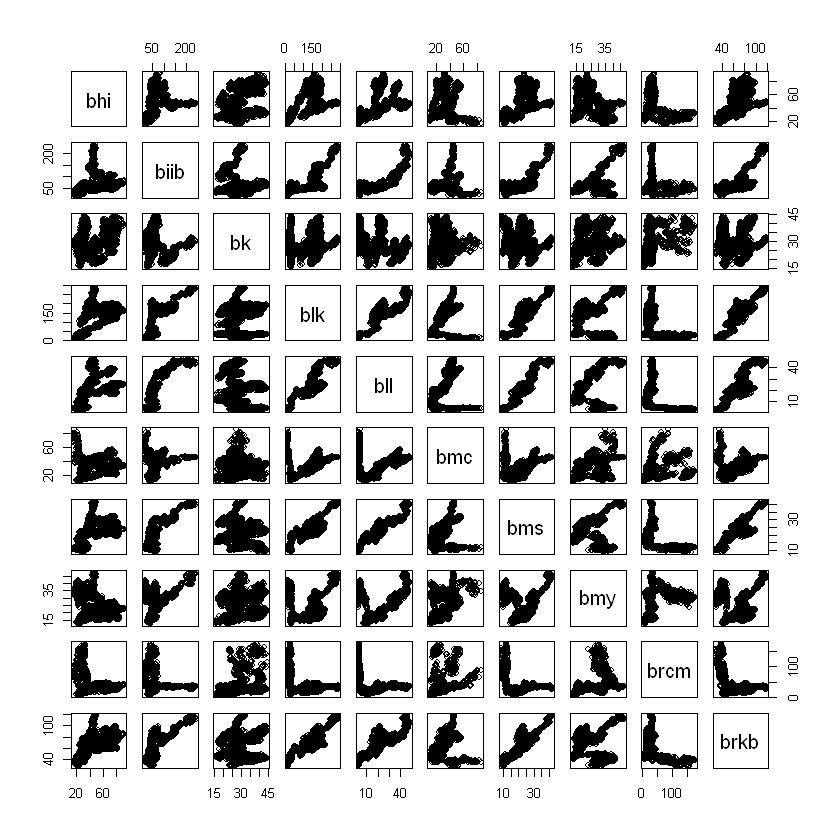

In [3]:
pairs(y[,2:11])

See something similar to a linear relationship between the following variables.

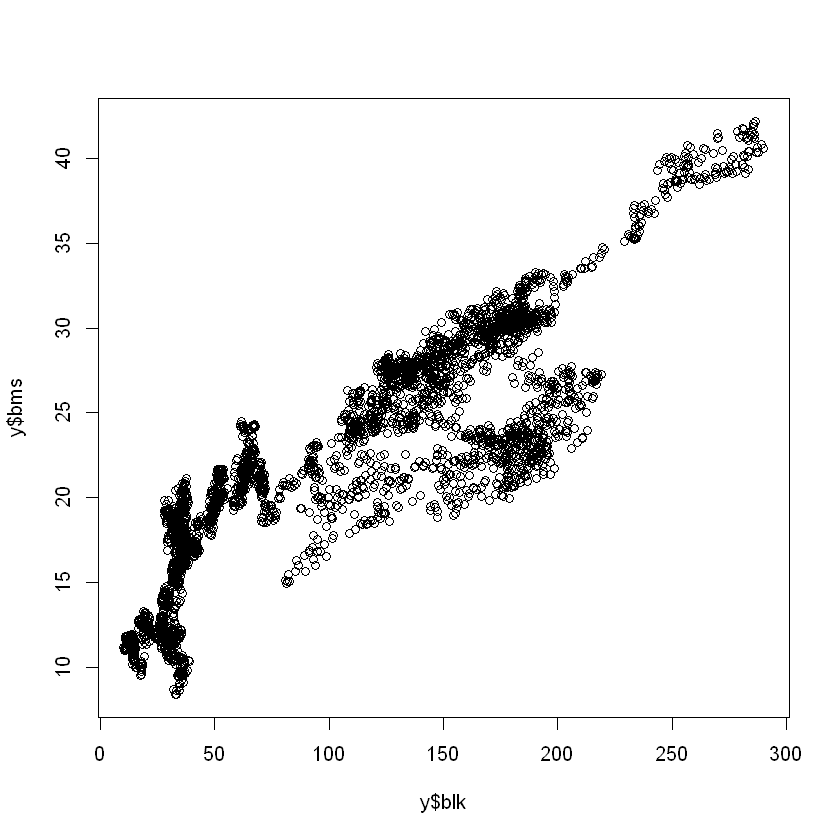

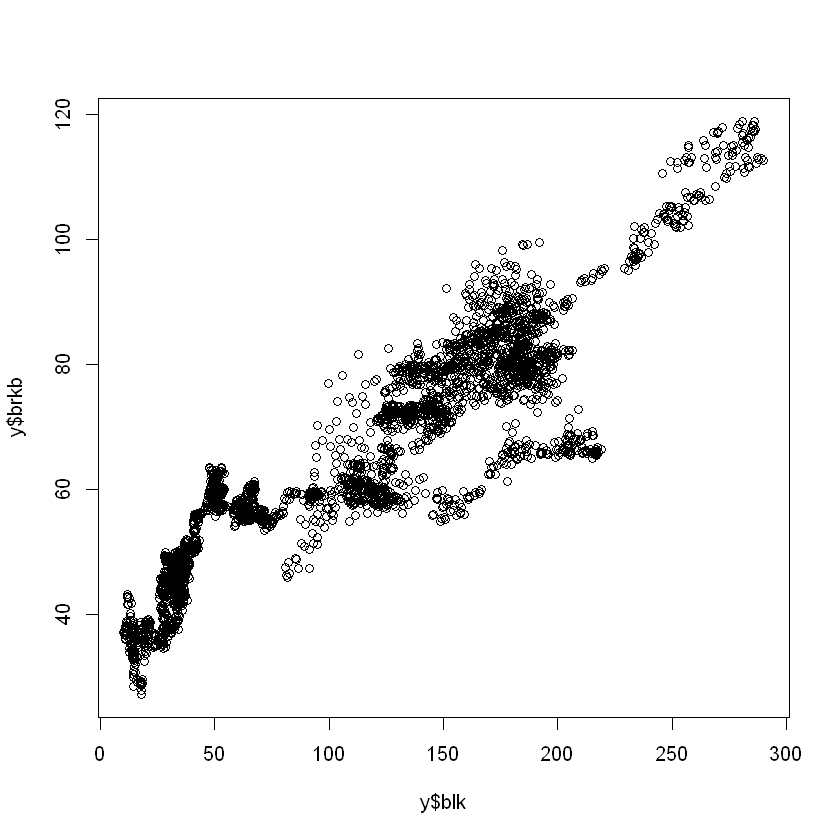

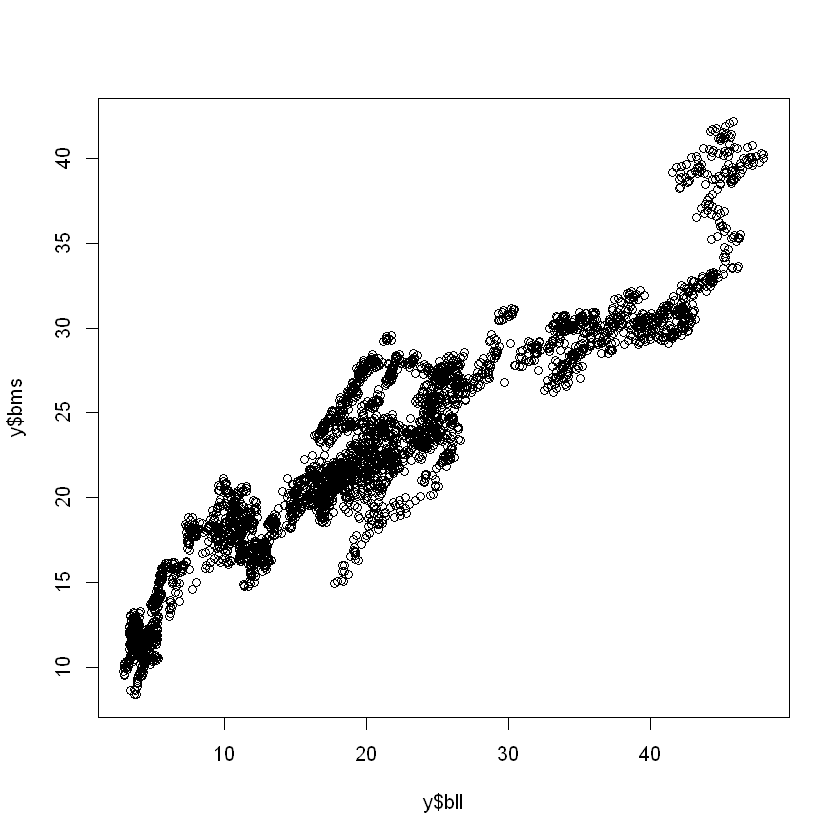

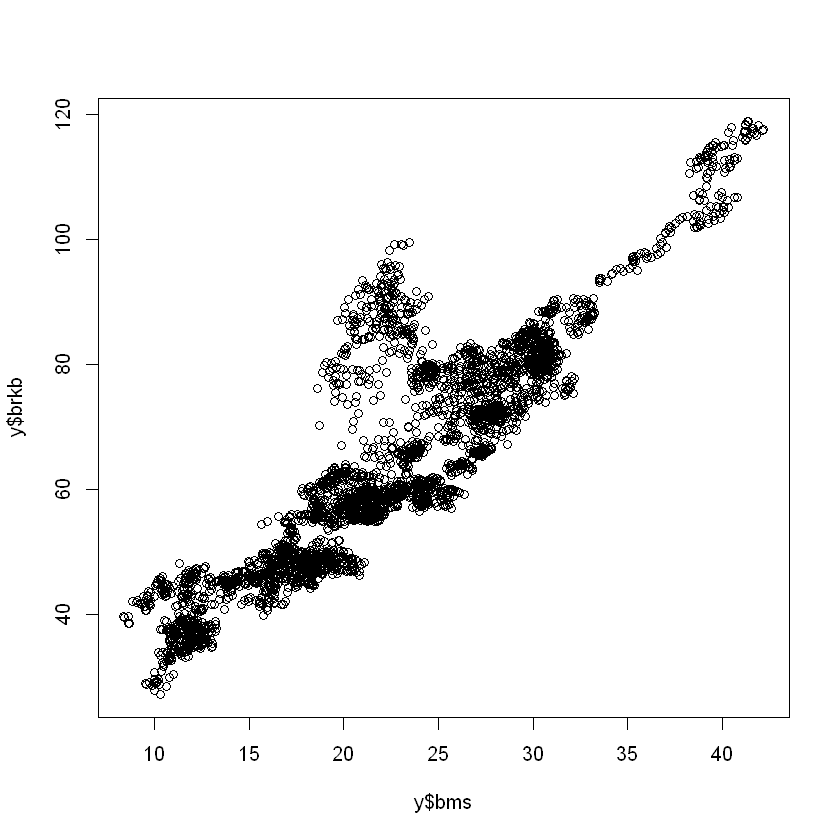

In [4]:
plot(y$blk, y$bms)
plot(y$blk, y$brkb)
plot(y$bll, y$bms)
plot(y$bms, y$brkb)

We will forecast the value for Biogen Inc. (variable **biib**). It is a biotechnology corporation specializing in the development and research of drugs for neurological diseases.

Let's prepare the data: for forecasting we don't need the first column that contains dates, we also delete the first record in the target column **biib** and the last records in the rest of the columns. That is, each line of the dataframe will contain the values of regressors (prices of trades of other companies for the current day) and feedback (price of trades of **biib** for the next day).
Our linear regression model will look for coefficients for regressors whose linear combination equals the response.

In [5]:
y <- y[,-1]
tmp <- y$biib[-1]
y <- y[-nrow(y),]
y$biib <- tmp

We fit the model according to the complete data (all records except the last 10).

In [6]:
nn <- nrow(y)
model1 <- lm(biib ~ ., data=y[0:(nn-10),])
summary(model1)


Call:
lm(formula = biib ~ ., data = y[0:(nn - 10), ])

Residuals:
    Min      1Q  Median      3Q     Max 
-36.186  -8.129   1.093   7.942  51.357 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -43.61874    2.07551 -21.016  < 2e-16 ***
bhi          -0.31451    0.02221 -14.164  < 2e-16 ***
bk           -0.01618    0.07072  -0.229 0.819052    
blk          -0.03550    0.01003  -3.541 0.000403 ***
bll           2.24588    0.07838  28.653  < 2e-16 ***
bmc          -1.03091    0.02691 -38.315  < 2e-16 ***
bms          -0.06270    0.10509  -0.597 0.550775    
bmy           2.77349    0.04408  62.927  < 2e-16 ***
brcm          0.06626    0.01080   6.133 9.57e-10 ***
brkb          0.71928    0.04154  17.315  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.44 on 3464 degrees of freedom
Multiple R-squared:  0.8955,	Adjusted R-squared:  0.8953 
F-statistic:  3299 on 9 and 3464 DF,  p-value: < 2.2e-16


According to the table of results, we can see that when fitting the model, a significant dependence of the response on the regressors was found (**p-value < 2.2e-16**), the coefficient of determination (**Multiple R-squared: 0.8955**) is high enough for the practical application of the forecast. A significant response dependence at the **α=0.05** level was found for all regressors except **bk** and **bms**.

Let's try to discard these regressors and again fit the full data.

In [8]:
model2 <- lm(biib ~ .-biib-bk-bms, data=y[0:(nn-10),])
summary(model2)


Call:
lm(formula = biib ~ . - biib - bk - bms, data = y[0:(nn - 10), 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-36.261  -8.076   1.099   7.935  51.197 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -44.418230   1.568439 -28.320  < 2e-16 ***
bhi          -0.319242   0.017307 -18.446  < 2e-16 ***
blk          -0.036700   0.009706  -3.781 0.000159 ***
bll           2.231195   0.044740  49.870  < 2e-16 ***
bmc          -1.026982   0.025983 -39.525  < 2e-16 ***
bmy           2.767260   0.038625  71.644  < 2e-16 ***
brcm          0.066363   0.010294   6.447  1.3e-10 ***
brkb          0.713024   0.036950  19.297  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.44 on 3466 degrees of freedom
Multiple R-squared:  0.8955,	Adjusted R-squared:  0.8953 
F-statistic:  4244 on 7 and 3466 DF,  p-value: < 2.2e-16


We see that the p-value and coefficient of determination have not changed.

Next, we fit the model based on short data (50 records preceding the last 10).

In [9]:
model3 <- lm(biib ~ ., data=y[(nn-60):(nn-10),])
summary(model3)


Call:
lm(formula = biib ~ ., data = y[(nn - 60):(nn - 10), ])

Residuals:
     Min       1Q   Median       3Q      Max 
-13.4024  -2.2588   0.7015   3.5038   8.8214 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -727.5468   217.0820  -3.351 0.001736 ** 
bhi            5.1123     1.2090   4.229 0.000128 ***
bk             5.9794     2.6026   2.297 0.026768 *  
blk            0.2386     0.1708   1.397 0.169875    
bll           -1.1374     1.8182  -0.626 0.535079    
bmc           24.5127     6.3274   3.874 0.000378 ***
bms           -5.9225     3.1946  -1.854 0.070954 .  
bmy            0.2379     0.6803   0.350 0.728367    
brcm           0.7341     0.6244   1.176 0.246443    
brkb          -3.4504     0.7912  -4.361 8.52e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.158 on 41 degrees of freedom
Multiple R-squared:  0.8077,	Adjusted R-squared:  0.7655 
F-statistic: 19.13 on 9 and 41 DF,  p-valu

According to the table of results, we can see that when fitting the model, a significant dependence of the response on the regressors was found (**p-value: 4.98e-12**), the coefficient of determination (**Multiple R-squared: 0.8077**) is high enough for the practical application of the forecast. A significant response dependence at the α=0.05 level was found for regressors **bhi**, **bk**, **bmc**, **brbk**.

Let's try to discard the extra regressors and again fit the short data.

In [10]:
model4 <- lm(biib ~ .-biib-blk-bll-bms-bmy-brcm, data=y[(nn-60):(nn-10),])
summary(model4)


Call:
lm(formula = biib ~ . - biib - blk - bll - bms - bmy - brcm, 
    data = y[(nn - 60):(nn - 10), ])

Residuals:
     Min       1Q   Median       3Q      Max 
-14.1344  -3.3467   0.2966   3.1297  16.0253 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -552.8294   241.7667  -2.287 0.026869 *  
bhi            3.0956     1.1350   2.727 0.009008 ** 
bk             5.5656     1.4126   3.940 0.000275 ***
bmc           20.5660     6.7413   3.051 0.003782 ** 
brkb          -4.1025     0.6038  -6.794 1.86e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.021 on 46 degrees of freedom
Multiple R-squared:  0.706,	Adjusted R-squared:  0.6804 
F-statistic: 27.62 on 4 and 46 DF,  p-value: 1.019e-11


We can see that after discarding the regressors, the coefficient of determination decreased, but is still quite high (**Multiple R-squared: 0.706**).

Let's calculate the differences between the true values of the response and its predictions based on the model for the test sample (the last 10 records), and display them in one figure for the different models.

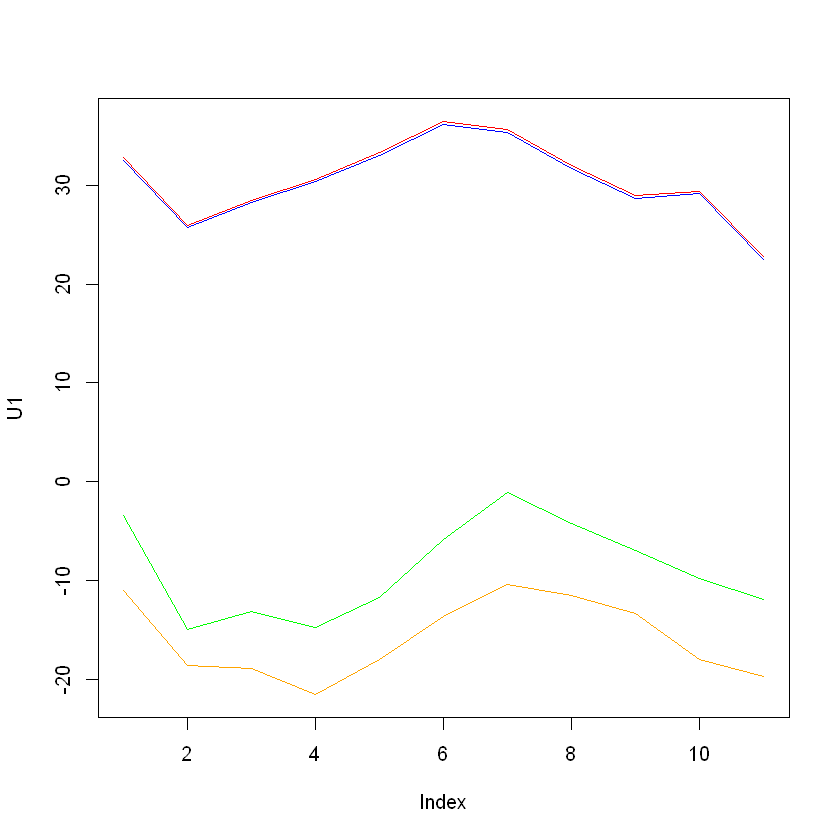

In [12]:
U1 = y$biib[(nn - 10):nn] - predict(model1, y[(nn - 10):nn,])
U2 = y$biib[(nn - 10):nn] - predict(model2, y[(nn - 10):nn,])
U3 = y$biib[(nn - 10):nn] - predict(model3, y[(nn - 10):nn,])
U4 = y$biib[(nn - 10):nn] - predict(model4, y[(nn - 10):nn,])

plot(U1, type="l", col="red", ylim=c(min(U1, U2, U3, U4), max(U1, U2, U3, U4)))
lines(U2, col="blue")
lines(U3, col="green")
lines(U4, col="orange")

The figure shows that the **third model** (green line) gives the best results, as the corresponding values fluctuate closer to zero than the other models.